# Simple Moving Average Trading Strategy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
apple = pd.read_csv("AAPl.csv")
apple = apple.set_index(pd.DatetimeIndex(apple['Date'].values))
apple = apple[:250]

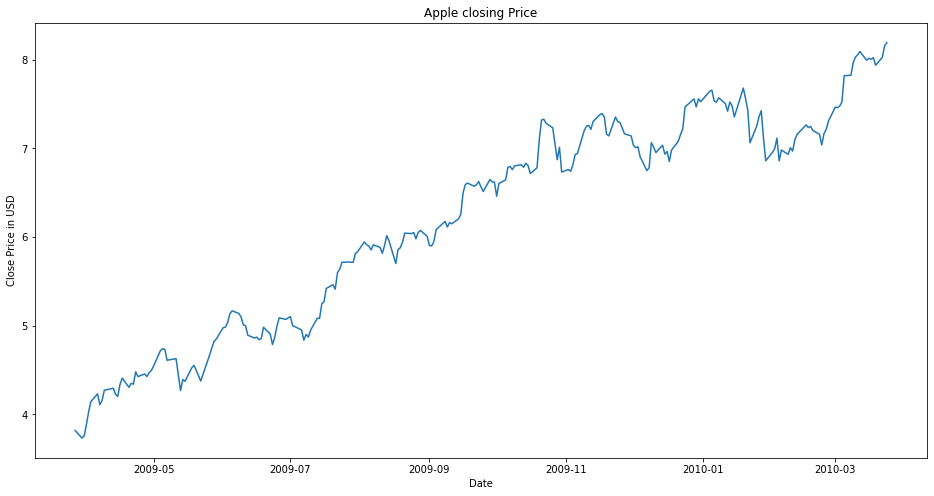

In [36]:
plt.figure(figsize=(16,8))
plt.title('Apple closing Price')
plt.plot(apple['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

In [37]:
def SMA(data, period = 30, column='Close'):
    return data[column].rolling(window=period).mean()


In [38]:
apple['SMA30'] = SMA(apple)
apple

,Date,Open,High,Low,Close,Adj Close,Volume,SMA30
2009-03-27,2009-03-27,3.865357,3.876071,3.800000,3.816071,3.247928,492872800,NaN
2009-03-30,2009-03-30,3.732500,3.750357,3.664643,3.731786,3.176192,502796000,NaN
2009-03-31,2009-03-31,3.766071,3.837500,3.750000,3.754286,3.195342,570080000,NaN
2009-04-01,2009-04-01,3.717500,3.892857,3.710357,3.881786,3.303859,589372000,NaN
2009-04-02,2009-04-02,3.933571,4.098214,3.920714,4.025357,3.426055,812366800,NaN
...,...,...,...,...,...,...,...,...
2010-03-18,2010-03-18,8.003571,8.035714,7.950357,8.023214,6.828705,342109600,7.452655
2010-03-19,2010-03-19,8.028214,8.044286,7.901071,7.937500,6.755752,559445600,7.488607
2010-03-22,2010-03-22,7.873929,8.071429,7.862500,8.026786,6.831744,456419600,7.523476
2010-03-23,2010-03-23,8.058571,8.170714,8.003571,8.155714,6.941478,602431200,7.564238


In [39]:
def strategy(df):
    buy, sell = [], []
    flag = 0
    buy_price = 0
    for i in range(0,len(df)):
        
        if df['SMA30'][i] > df['Close'][i] and flag == 0:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            buy_price = df['Close'][i]
            flag = 1
            
        elif df['SMA30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            buy_price = 0
            flag = 0
            
        else:
            sell.append(np.nan)
            buy.append(np.nan)
            
    return(buy, sell)

In [40]:
strat = strategy(apple)
apple['Buy'] = strat[0]
apple['Sell'] = strat[1]

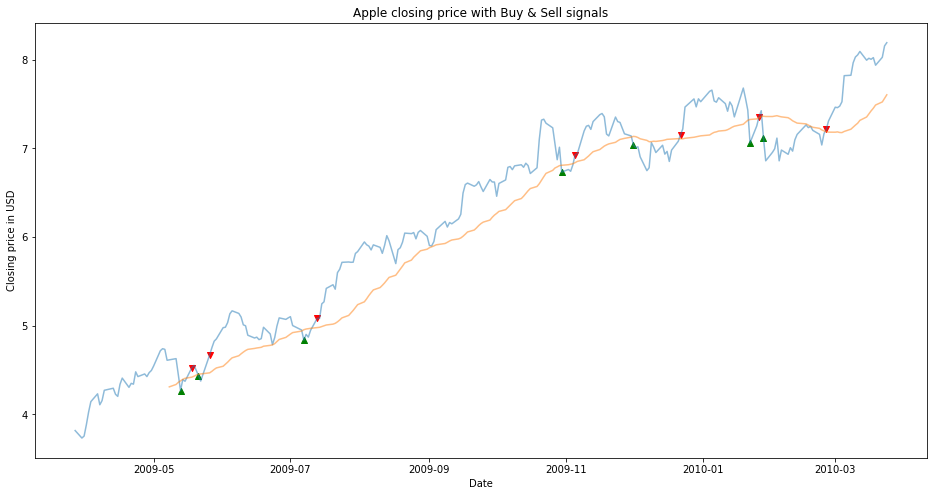

In [41]:
plt.figure(figsize=(16,8))
plt.title('Apple closing price with Buy & Sell signals')
plt.plot(apple['Close'], alpha = 0.5, label = 'Close')
plt.plot(apple['SMA30'], alpha = 0.5, label = 'SMA30')
plt.scatter(apple.index, apple['Buy'], color='green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(apple.index, apple['Sell'], color='red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.show()


In [ ]:
''